# Regresion Logistica

Algoritmo de la famila de los modelos lineales

La Regresion logistica es una funcion matematica o llamada funcion sigmoide,  la idea es que este algoritmo es muy usado para problemas dicotomicos, es decir de respuesta si o no, ejemplo deteccion de fraude.   

Como todo algoritmo lineal es muy importante trabajar sus trasnformaciones

![log](https://live.staticflickr.com/65535/48057314931_63fecdb916_b.jpg).  


Como vemos es una curva probabilistica donde existe un threshold (generalmente 0.5) que es donde decide si sucede o no un hecho. Pero en verdad al fina nos devuelve una probabilidad




La funcion que nosotros podemos utilizar para trasnfomrar manualmente un resultado es:

![formula](https://live.staticflickr.com/65535/48057409702_21e5b93574_b.jpg)


## Hiperparametros

* **fit_intercept**: puede ser True/false si queremos tener una constante β₀ o no

* penalty: es la regularización, hay distintos tipos:

  * L1: hace que algunas β sean 0. Es una forma de forzar la selección de variable, por ejemplo si el peso que multiplica a nuestra variable “Newspaper” es igual a cero, esa variable no influirá en nuestra predicción
  * L2: también conocida como Ridge, lo que hace es estimar β pequeños, sirve para controlar el sobre ajuste.
  * elasticnet: sirve para aplicar la regularización L1 y L2 a la vez, hay que fijar un float entre 0 y 1, siendo 0 la aplicación completa de la regularización L1 y nada de la L2 y viceversa.

* tol: es un parámetro que se encuentra dentro de los llamados “early stopping” es para que una vez alcanzado el criterio de tolerancia que nosotros fijemos, el algoritmo pare de iterar.

* C: un parámetro que aplica regularización con el objetivo de reducir el overfitting, cuanto más pequeño es el valor, mayor es la regularización.

* solver: puede ser newton-cg/lbf Crear un modelo de Regresión Logística en Python con la librería Sklearn y ver los hiperparámetros que nos ofrece /liblinear/sag/saga. Es el algoritmo encargado de resolver el problema de clasificiación,

* multi_class: puede ser ovr/multinomial/auto en el caso de que tengamos un problema de clasificación, la estrategia a seguir para resolver dicho problema


## Sugerencias



*   Como modelo lineal , se debe transformar la data , en lo posible normalizarla
*   omitir los outliers
*.  no tener colinealidad entre variables, si hay varialbes muy relacionadas , borrar una
* Que los Datasets sean grandes ,  + de 2000 datos



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%run /content/drive/MyDrive/Coderhouse/Clase41/manejo_de_datos.ipynb

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train.shape

(891, 10)

In [ ]:
#entreno
clf = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=34)

In [ ]:
#prediccion
predictions = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions)

array([[237,  42],
       [ 26, 113]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       279
           1       0.73      0.81      0.77       139

    accuracy                           0.84       418
   macro avg       0.82      0.83      0.82       418
weighted avg       0.84      0.84      0.84       418



In [ ]:
clf.coef_[0]

array([-1.09568052e+00, -4.03031469e-02, -2.99893949e-01, -1.23043726e-01,
        2.26571742e-03,  2.27873817e+00, -3.87566131e-01,  9.04968184e-01,
        5.78240888e-01,  4.07962968e-01])

In [ ]:
importance = clf.coef_[0]
impo = pd.DataFrame(list(zip(X_train.columns, importance)), columns=['feature', 'importance'])
impo.sort_values('importance', ascending=False)

,feature,importance
5,Sex_female,2.278738
7,Embarked_C,0.904968
8,Embarked_Q,0.578241
9,Embarked_S,0.407963
4,Fare,0.002266
1,Age,-0.040303
3,Parch,-0.123044
2,SibSp,-0.299894
6,Sex_male,-0.387566
0,Pclass,-1.095681


Feature: Pclass, Score: -1.09568
Feature: Age, Score: -0.04030
Feature: SibSp, Score: -0.29989
Feature: Parch, Score: -0.12304
Feature: Fare, Score: 0.00227
Feature: Sex_female, Score: 2.27874
Feature: Sex_male, Score: -0.38757
Feature: Embarked_C, Score: 0.90497
Feature: Embarked_Q, Score: 0.57824
Feature: Embarked_S, Score: 0.40796


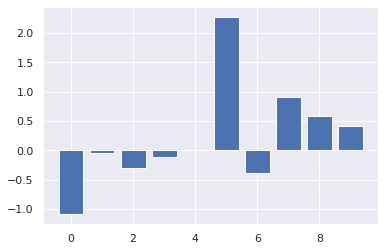

In [ ]:
from matplotlib import pyplot

# summarize feature importance
for i,v in zip(X_train.columns, importance):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
clf.intercept_

array([8.74265175])